# Step1 - Imports Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import sklearn

# Step2 - Load dataset

In [2]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
# Fill in any missing values in the data with past values
df = df.ffill()
print("Train:")
display(df.head(2))

test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
# Fill in any missing values in the data with past values
test_df = test_df.ffill()
print("Test:")
display(test_df.head(2))

Train:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Test:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


# Step3 - Prepare Data

In [3]:
# Feature selection
FEATURES = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
TARGET = ['Survived']

df = df[FEATURES+TARGET]
test_df = test_df[FEATURES]

# Pre-process data
## text to num mapping
EMB_MAP = {'S':0, 'C':1, 'Q':2}
SEX_MAP = {'male':0, 'female':1}

## Process func.
def text2num(df):
    df['Embarked'] = df.Embarked.map(EMB_MAP)
    df['Sex'] = df.Sex.map(SEX_MAP)
    return df

## Apply
df = text2num(df)
test_df = text2num(test_df)

## Normalization
from sklearn.preprocessing import StandardScaler
pre = StandardScaler()

df[FEATURES] = pre.fit_transform(df[FEATURES])
test_df[FEATURES] = pre.transform(test_df[FEATURES]) # don't fit on test data


# Display
print("Train:")
display(df.head(2))

print("Test:")
display(test_df.head(2))

Train:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,0.827377,-0.737695,-0.521198,0.432793,-0.473674,-0.502445,-0.571898,0
1,-1.566107,1.355574,0.578729,0.432793,-0.473674,0.786845,0.995982,1


Test:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,-0.737695,0.338120,-0.474545,-0.473674,-0.490783,2.563862
1,0.827377,1.355574,1.197438,0.432793,-0.473674,-0.507479,-0.571898


# Step4 - Data Split

In [4]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(df, test_size=0.2, random_state=42)

Let's keep the list of the input features of the model. Notably, we don't want to train our model on the "PassengerId" and "Ticket" features.

# Step5 - Training

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the logistic regression model
model = KNeighborsClassifier() #  LogisticRegression()

# Train the model on the training data
model.fit(train_df[FEATURES], train_df[TARGET])

# Make predictions on the validation data
y_pred = model.predict(valid_df[FEATURES])

# Calculate the accuracy of the model
accuracy = accuracy_score(valid_df[TARGET], y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8100558659217877


/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Step6 - Inference/Prediction

In [6]:
# Make predictions on the testing data
test_pred = model.predict(test_df[FEATURES])

print(np.unique(test_pred, return_counts=True))

(array([0, 1]), array([256, 162]))


# Step7 - Submission

,PassengerId,Survived
0,892,0
1,893,0


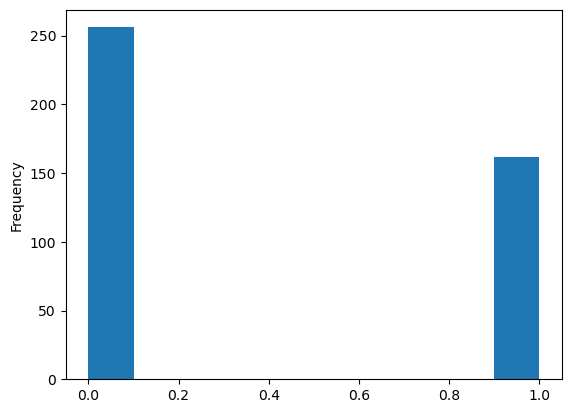

In [7]:
# Make submission
sub_df = pd.read_csv('/kaggle/input/titanic/test.csv')
sub_df = sub_df[['PassengerId']]
sub_df['Survived'] = test_pred

# Save submission
sub_df.to_csv('submission.csv',index=False)

# Display
display(sub_df.head(2))
sub_df.Survived.plot.hist();